## MEDIDAS DE RIESGO Y CORRELACIÓN ENTRE TÍTULOS

El riesgo de un activo representa la posibilidad de que el rendimiento efectivamente realizado de un activo no coincida con el esperado. Se cuantifica a través de la desviación tipica poblacional o cuasidesviación tiptica de la rentabilidad de sus valores:

$$ \sigma=\sqrt{\frac{\sum_{t=1}^{T} {(r_t-\bar{r})}^2}{T}}$$

### **Ejercicio 1.6.**

Desviación típica de la rentabilidad simple y continua con los datos del Ejercicio 1.3.

In [13]:
import pandas as pd
import numpy as np

cot=pd.read_excel("https://raw.githubusercontent.com/jjimvar/Gestion-de-carteras/main/1.%20Conceptos%20B%C3%A1sicos/ejemplos_l1.xlsx", 
    sheet_name="Ejemplo 1.3")

#Rentabilidades
cot["Rent. Simple"]=((cot["Cotización"]/cot["Cotización"].shift(1))-1)*100
cot["Rent. Instantánea"]=np.log(cot["Cotización"]/cot["Cotización"].shift(1))*100
print("Medidad de rentabilidad:")
print(f"- Media diaria simple: {round(cot["Rent. Simple"].mean(), 5)}%")


#Desv. Est.
desv_estm=cot["Rent. Instantánea"].std(ddof=0) #Muestral
desv_estp=cot["Rent. Instantánea"].std(ddof=1) #Poblacional

print("                     ")
print("Medidad de deviación:")
print(f" -Desviación tipica muestral diaria (rentabilidad simple): {round(desv_estm,5)}%")
print(f" -Cuasidesviación tipica (poblacional) diaria (rentabilidad simple): {round(desv_estp,5)}%")

Medidad de rentabilidad:
- Media diaria simple: 0.11465%
                     
Medidad de deviación:
 -Desviación tipica muestral diaria (rentabilidad simple): 0.23565%
 -Cuasidesviación tipica (poblacional) diaria (rentabilidad simple): 0.24146%


De esta forma, podemos interpretar la desviación típica como la desviación media de las rentabilidades de un activo con respecto a su rentabilidad promedio. Es decir, la renatbilidad media diaria es del 0,11465% y presenta una desv. tipica del 0,23565%. 

$$Intervalo Fluctuación Rentabilidad=[-0.121, 0.3503]$$

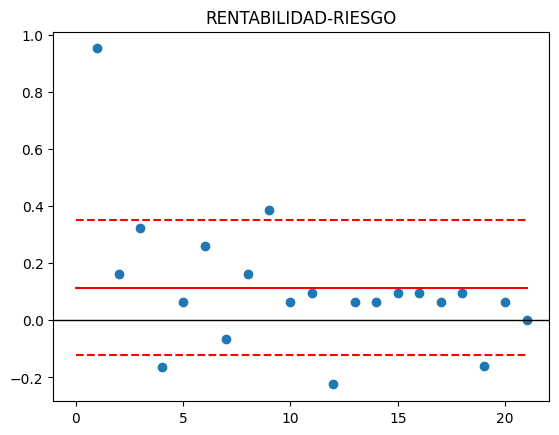

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

cot["R mean"]=cot["Rent. Simple"].mean()
cot["Des. Est. Up"]=cot["Rent. Simple"].mean()+desv_estm
cot["Des. Est. Low"]=cot["Rent. Simple"].mean()-desv_estm

plt.scatter(cot["Sesión"], cot["Rent. Simple"])
plt.plot(cot["Sesión"],cot["R mean"], color="red")
plt.plot(cot["Sesión"],cot["Des. Est. Up"], color="red", linestyle="--")
plt.plot(cot["Sesión"],cot["Des. Est. Low"], color="red", linestyle="--")
plt.title("RENTABILIDAD-RIESGO")
plt.axhline(0, color="black", linewidth=1, linestyle="-")
plt.show()

### **EJERCICIO 1.7.**

Desviación típica de la rentabilidad simple y continua con los datos del Ejercicio 1.4.

In [ ]:
import pandas as pd

df=pd.read_excel("https://github.com/jjimvar/Gestion-de-carteras/raw/refs/heads/main/1.%20Conceptos%20B%C3%A1sicos/ejemplos_l1.xlsx",
                 sheet_name="Ejemplo 1.4")

df.set_index("Sesión")

#Rentabilidad media mensual
df["R simple"]=df["Cotización"]/df["Cotización"].shift(1)-1
df["R instantánea"]=np.log(df["Cotización"]/df["Cotización"].shift(1))

#Desvación tipica mensual
sigma_simp=df["R simple"].std(ddof=1)*100
sigma_inst=df["R instantánea"].std(ddof=1)*100

print("Medidad de deviación:")
print(f" -Cuasidesviación mensual (rentabilidad simple): {round(sigma_simp,5)}%")
print(f" -Cuasidesviación mensual (rentabilidad instantánea): {round(sigma_inst,5)}%")

Medidad de deviación:
 -Cuasidesviación mensual (rentabilidad simple): 2.81775%
 -Cuasidesviación mensual (rentabilidad instantánea): 2.80288%


Cuando trabajamos con períodos inferiores al año, es necesario anualizar los resultados. 

Bajo el supuesto de que **los rendimientos no están correlacionados en intervalos sucesivos de tiempo, o sea, son independientes y están identicamente distribuidos**, podemos afirmar que:

$$\sigma_a^2=\sigma_k^2·k; \sigma_a=\sigma_k·\sqrt{k}$$

En general:

$$\sigma_a=\sigma_m·\sqrt{12}$$
$$\sigma_a=\sigma_d·\sqrt{252}$$
$$\sigma_m=\sigma_d·\sqrt{20}$$

### **Ejercicio 1.8.**

Con los datos del ejemplo 1.7, determinar riesgo anual

In [50]:
from math import sqrt
sigma_a_simple=sigma_simp_p*sqrt(12)
sigma_a_inst=sigma_inst_p*sqrt(12)


print("Medidad de deviación:")
print(f" -Cuasidesviación anual (rentabilidad simple): {round(sigma_a_simple,5)}%")
print(f" -Cuasidesviación anual (rentabilidad instantánea): {round(sigma_a_inst,5)}%")

Medidad de deviación:
 -Cuasidesviación anual (rentabilidad simple): 9.76096%
 -Cuasidesviación anual (rentabilidad instantánea): 9.70946%


Las variaciones en la rentabilidad de un activo pueden estar influenciadas por las variaciones ocasionadas en otros activos. Esto se mide con la **covarianza**:

$$cov_{ij}=\frac{\sum_{t=1}^{T}{(r_{it}-\bar{r_i})(r_{jt}-\bar{r_j})}}{T-1}$$

Mide si las retabilidades se mueven en la misma dirección (covarianza positiva) o en direcciones opuestas (covarianza negativa).

Para cuantificar el peso de esa relación, se hace uso del **coeficiente de correlación**:

$$\rho_{ij}=\frac{\sum_{t=1}^{T}{(r_{it}-\bar{r_i})(r_{jt}-\bar{r_j})}}{(\sum_{t=1}^{T} {(r_{it}-\bar{r_i})}^2)·(\sum_{t=1}^{T} {(r_{jt}-\bar{r_j})}^2)}$$

$$(|\rho|=1, Correlación fuerte)$$
$$(\rho=0, Correlación débil)$$



### **Ejercicio 1.9.**

De las cotizaciones de 2 activos, calcular:
- Rentabilidad media mensual simple instantánea
- Riesgo mensual simple e instantáneo
- Covarianza y coeficiente de correlación lineal para rentabilidades simple y para rentabilidades continuas

In [2]:
import pandas as pd
import numpy as np

#Carga datos
cot=pd.read_excel("https://github.com/jjimvar/Gestion-de-carteras/raw/refs/heads/main/1.%20Conceptos%20B%C3%A1sicos/ejemplos_l1.xlsx",
                  sheet_name="Ejemplo 1.9")

cot.columns=cot.iloc[0]
cot=cot.iloc[1:]
#Pasamos todo a float:
for i in cot.columns:
    cot[i]=cot[i].astype(float)

#Rentabilidades: Activo A
cot["Activo A: Rm"]=(cot["Activo A"]/cot["Activo A"].shift(1)-1)*100
cot["Activo A: Km"] = np.log(cot["Activo A"]/ cot["Activo A"].shift(1)) * 100
cot["Activo A: sigma_rm"]=cot["Activo A: Rm"].std()
cot["Activo A: sigma_km"]=cot["Activo A: Km"].std()

#Rentabilidades: Activo B
cot["Activo B: Rm"]=(cot["Activo B"]/cot["Activo B"].shift(1)-1)*100
cot["Activo B: Km"] = np.log(cot["Activo B"]/ cot["Activo B"].shift(1)) * 100
cot["Activo B: sigma_rm"]=cot["Activo B: Rm"].std()
cot["Activo B: sigma_km"]=cot["Activo B: Km"].std()

#Mostramos las medidas 
print("Activo A:")
print(f"- Rentabilidad media mensual simple: {round(cot['Activo A: Rm'].mean(),5)}%")
print(f"- Rentabilidad media mensual instantánea: {round(cot['Activo A: Km'].mean(),5)}%")
print(f"- Riesgo mensual simple: {round(cot['Activo A: sigma_rm'].mean(),5)}%")
print(f"- Riesgo mensual instantáneo: {round(cot['Activo A: sigma_km'].mean(),5)}%")


print("                     ")
print("Activo B:")
print(f"- Rentabilidad media mensual simple: {round(cot['Activo B: Rm'].mean(),5)}%")
print(f"- Rentabilidad media mensual instantánea: {round(cot['Activo B: Km'].mean(),5)}%")
print(f"- Riesgo mensual simple: {round(cot['Activo B: sigma_rm'].mean(),5)}%")
print(f"- Riesgo mensual instantáneo: {round(cot['Activo B: sigma_km'].mean(),5)}%")

Activo A:
- Rentabilidad media mensual simple: 1.90261%
- Rentabilidad media mensual instantánea: 1.85541%
- Riesgo mensual simple: 2.61633%
- Riesgo mensual instantáneo: 2.51045%
                     
Activo B:
- Rentabilidad media mensual simple: 1.36721%
- Rentabilidad media mensual instantánea: 1.34949%
- Riesgo mensual simple: 1.38321%
- Riesgo mensual instantáneo: 1.35607%


In [12]:
#Medidas de relación
cov_rm=(cot["Activo A: Rm"]/100).cov(cot["Activo B: Rm"]/100)
corr_rm=(cot["Activo A: Rm"]/100).corr(cot["Activo B: Rm"]/100)

cov_km=(cot["Activo A: Km"]/100).cov(cot["Activo B: Km"]/100)
corr_km=(cot["Activo A: Km"]/100).corr(cot["Activo B: Km"]/100)

print("Rentabilidad Simple:")
print(f"- Covarianza: {round(cov_rm, 7)}")
print(f"- Coef. Correlación: {round(corr_rm, 5)}")
print("                   ")
print("Rentabilidad Continua:")
print(f"- Covarianza: {round(cov_km, 7)}")
print(f"- Coef. Correlación: {round(corr_km, 5)}")


Rentabilidad Simple:
- Covarianza: 0.0002602
- Coef. Correlación: 0.71895
                   
Rentabilidad Continua:
- Covarianza: 0.0002465
- Coef. Correlación: 0.72395


### **Ejercicio 1.10.**

Calcular el coeficiente de correlación lineal y representar gráficamente las rentabilidades

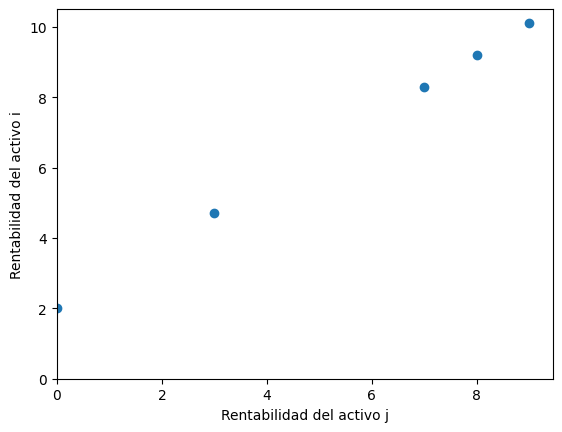

Observamos como la ecuación de la relación de los activos es: $r_i=2+0,9r_m$ 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

rent=pd.DataFrame({"Activo i": [0.00, 3.00, 7.00, 8.00, 9.00],
                   "Activo j": [2.00, 4.70, 8.30, 9.20, 10.10]})

corr=rent["Activo i"].corr(rent["Activo j"]) #Calculamos la correlación

plt.scatter(rent["Activo i"], rent["Activo j"])
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.ylabel("Rentabilidad del activo i")
plt.xlabel("Rentabilidad del activo j")
plt.show()

print("Observamos como la ecuación de la relación de los activos es: r_i=2+0,9r_j")